In [1]:
from pyxscat.h5_integrator import H5GIIntegrator
from pathlib import Path
from silx.io import nxdata
from silx.io import h5py_utils
PATH = r'C:\Users\edgar1993a\Work Folders\Documents\Python\pyxscat\pyxscat\test\test_edf\test_NCD'
h5 = H5GIIntegrator(root_directory=PATH)

ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_csr: cannot import name 'ocl_azim_csr' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_lut for: cannot import name 'ocl_azim_lut' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_sort for: cannot import name 'ocl_sort' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)


In [2]:
h5.update_datafiles(search=True)

In [3]:
h5.update_ponifiles()

In [13]:
h5.get_entry_name('entry_0002')

In [4]:
h5.get_sample_address(entry_name='entry_0001', get_relative_address=False)

'C:/Users/edgar1993a/Work Folders/Documents/Python/pyxscat/pyxscat/test/test_edf/test_NCD/Reference'

In [14]:
h5.get_metadata_dataframe(sample_name='A1', list_keys=['spitch', 'Monitor'])

,filename,spitch,Monitor
0,rayonix_A1_spitch_0.15_000_0000.edf,0.15,2018.734168
1,rayonix_A1_spitch_0.12_000_0000.edf,0.12,2019.056882
2,rayonix_A1_spitch_0.1_000_0000.edf,0.10,2019.455155
3,rayonix_A1_spitch_0.2_000_0000.edf,0.20,2018.442513


In [4]:
h5.update_metadata_keys(iangle_key='spitch', norm_factor='Monitor')

In [5]:
h5._norm_key

'Monitor'

In [6]:
h5.get_dataset_norm_factor(sample_name='A1')

array([2018.44251261, 2019.45515538, 2019.05688168, 2018.73416794])

In [7]:
h5.get_metadata_dataset(sample_name='A1', key_metadata='Monitor')

array([2018.44251261, 2019.45515538, 2019.05688168, 2018.73416794])

In [18]:
import h5py
from silx.io import nxdata, open, commonh5, h5py_utils
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import fabio
from collections import defaultdict

In [2]:
NXENTRY_KEY = 'NXentry'
NXCLASS_KEY = 'NX_class'
NXDATA_KEY = 'NXdata'
DEFAULT_KEY = 'default'

In [11]:
H5_FILE = r'C:\Users\edgar1993a\Work Folders\Documents\Python\pyxscat\pyxscat\test\test_edf\test_NCD\test_NCD_nx.h5'
PATH = r'C:\Users\edgar1993a\Work Folders\Documents\Python\pyxscat\pyxscat\test\test_edf\test_NCD\A1'
FILES = [str(item) for item in Path(PATH).rglob('*.edf')]

In [13]:
h5 = h5py_utils.File(H5_FILE, 'w')
h5.close()

In [45]:
def get_full_dict_metadata(sample_address=''):
    file_list = [str(item) for item in Path(sample_address).rglob('*.edf')]
    header_dict = defaultdict(list)
    for file in FILES:
        header = fabio.open(file).header
        for key, value in header.items():
            try:
                value = float(value)
            except:
                value = str(value).encode()
            header_dict[key].append(value)
        header_dict['data_filename'].append(file.encode())
    return header_dict

In [35]:
def get_list_data_address(sample_address=''):
    file_list = [str(item) for item in Path(sample_address).rglob('*.edf')]
    header_dict = defaultdict(list)
    for file in FILES:
        file = file.encode()
        header_dict['data'].append(file)
    return header_dict

In [46]:
def save_nx_full_dataset(sample_name='', sample_address=''):
    header_dict = get_full_dict_metadata(sample_address=sample_address)
    for key, value in header_dict.items():
        nxdata.save_NXdata(
            filename=H5_FILE,
            signal_name=key,
            signal=np.array(value),
            interpretation='spectrum',
            nxentry_name=sample_name,
            nxdata_name=key,
        )

In [34]:
def save_nx_metadata_dataset(sample_name='', sample_address=''):
    header_dict = get_compiled_dict_metadata(sample_address=sample_address)
    for key, value in header_dict.items():
        nxdata.save_NXdata(
            filename=H5_FILE,
            signal_name=key,
            signal=np.array(value),
            interpretation='spectrum',
            nxentry_name=sample_name,
            nxdata_name=key,
        )

In [42]:
def save_nx_data_dataset(sample_name='', sample_address=''):
    data_list = get_list_data_address(sample_address=sample_address)
    print(data_list)
    nxdata.save_NXdata(
            filename=H5_FILE,
            signal_name='data',
            signal=data_list,
            interpretation='spectrum',
            nxentry_name=sample_name,
            nxdata_name='data',
        )

In [47]:
save_nx_full_dataset(sample_address=PATH, sample_name='vvvvvv')

In [39]:
save_nx_metadata_dataset(sample_address=PATH, sample_name='bbbb')

In [43]:
save_nx_data_dataset(sample_address=PATH, sample_name='cccc')

defaultdict(<class 'list'>, {'data': [b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.12_000_0000.edf', b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.12_000_0000_x000.edf', b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.15_000_0000.edf', b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.1_000_0000.edf', b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.2_000_0000.edf']})


TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [41]:
get_list_data_address(sample_address=PATH)

defaultdict(list,
            {'data': [b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.12_000_0000.edf',
              b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.12_000_0000_x000.edf',
              b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.15_000_0000.edf',
              b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.1_000_0000.edf',
              b'C:\\Users\\edgar1993a\\Work Folders\\Documents\\Python\\pyxscat\\pyxscat\\test\\test_edf\\test_NCD\\A1\\rayonix_A1_spitch_0.2_000_0000.edf']})

In [ ]:
entry_name = 'entry_11'

with h5py_utils.File(H5_FILE, 'r+') as h5:
    entry = h5.create_group(entry_name)
    entry.attrs[NXCLASS_KEY] = NXENTRY_KEY

    h5[entry_name].create_dataset(
        name=DEFAULT_KEY,
        data=np.array([]),
    )
    h5[entry_name][DEFAULT_KEY].attrs[NXCLASS_KEY] = NXDATA_KEY

    print(nxdata.is_valid_nxdata(h5[entry_name]))

False


In [26]:
with h5py_utils.File(H5_FILE, 'r+') as h5:
    print(nxdata.is_NXentry_with_default_NXdata(h5['my_entry_8']))

True


In [48]:
a = np.array([
    np.linspace(0,10,10),
    np.linspace(0,10,10)**2,
])
b = np.array([
    np.linspace(0,20,20),
    np.linspace(0,20,20)**2,
])

True

In [38]:
with h5py_utils.File(H5_FILE, 'r+') as h5:
    ds = h5['my_entry_8']['my_curve']['frames'][()]
    print(ds.shape)

(2, 10)


In [ ]:
with h5py_utils.File(H5_FILE, 'r+') as h5:
    dataset_path = f'my_entry_10/my_curve/frames'
    
    ds = h5['my_entry_10']['my_curve']['frames'][()]
    print(ds.shape)

In [60]:
nxdata.save_NXdata??

Signature:
nxdata.save_NXdata(
    filename,
    signal,
    axes=None,
    signal_name='data',
    axes_names=None,
    signal_long_name=None,
    axes_long_names=None,
    signal_errors=None,
    axes_errors=None,
    title=None,
    interpretation=None,
    nxentry_name='entry',
    nxdata_name=None,
)
Source:   
def save_NXdata(filename, signal, axes=None,
                signal_name="data", axes_names=None,
                signal_long_name=None, axes_long_names=None,
                signal_errors=None, axes_errors=None,
                title=None, interpretation=None,
                nxentry_name="entry", nxdata_name=None):
    """Write data to an NXdata group.

    .. note::

        No consistency checks are made regarding the dimensionality of the
        signal and number of axes. The user is responsible for providing
        meaningful data, that can be interpreted by visualization software.

    :param str filename: Path to output file. If the file does not
        exists, i

In [57]:
with h5py_utils.File(H5_FILE, 'r+') as h5:
    dataset_path = f'my_entry_8/my_curve/frames'
    dataset = h5[dataset_path]
    
    current_shape = dataset.shape
    new_shape = (current_shape[0], current_shape[1] + b.shape[1])

    dataset.resize(new_shape)

    
    print(new_shape)

TypeError: Only chunked datasets can be resized

In [16]:
a.shape

(2, 10)

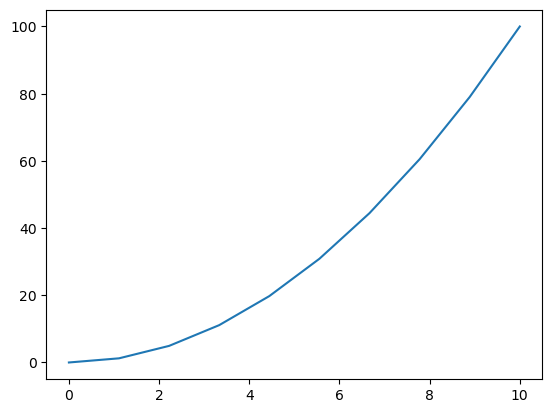

In [21]:
plt.plot(a[0,:],a[1,:])

In [10]:
h5 = h5py_utils.File(H5_FILE, 'r+')

In [14]:
h5[NXENTRY_KEY]

<HDF5 group "/NXentry" (0 members)>

In [18]:
nxdata.is_NXroot_with_default_NXdata(h5[NXENTRY_KEY])

False